# Gradient Descent

## Implementing gradient descent

In [ ]:
# importing the basic libraries
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

In [ ]:
# returns value of the function
def computeFunction(x1, x2, gamma):
    return np.square(x1) + gamma*np.square(x2) - x1*x2 - x1 - x2

In [ ]:
# returns gradient w.r.t. x1
def computeGradient_x1(x1, x2, gamma):
    return 2*x1 - x2 - 1

In [ ]:
# returns gradient w.r.t. x2
def computeGradient_x2(x1, x2, gamma):
    return 2*gamma*x2 - x1 - 1

In [ ]:
# returns x1 and x2 after applying one update with step size, lr and respective gradient.
def updateParams(x1, x2, del_x1, del_x2, lr):
    return (x1 - lr*del_x1, x2 - lr*del_x2)

In [ ]:
# This is a general method to test convergence of any series based on std-deviation of last n elements
# Note: This has not been used here, the gradient based convergence is used instead
def checkConvergence(values, last_n, threshold):
    deviation = np.std(values[-last_n:])
    #print("Current standard deviation is", deviation)
    if deviation > threshold:
        return False
    else:
        return True

In [ ]:
# Checks if the gradient vector is close enough to zero to establish convergence
def checkConvergenceGrad(grad, threshold):
    magnitude = np.linalg.norm(grad)
    #print("Current gradient magnitude is", magnitude)
    if magnitude > threshold:
        return False
    else:
        return True

In [ ]:
checkConvergence([5, 3, 2, 1], 2, 1)

True

In [ ]:
# Main component which performs gradient descent while convergence or max iterations is not reached. It returns x1, x2 and the value of the function along each step.
def gradientDescent(x1, x2, gamma, max_iter, threshold, lr):
    converged = False
    last_n = 4
    count = 0
    xOne = []
    xTwo = []
    values = []
    while not converged and count <= max_iter:
        xOne.append(x1)
        xTwo.append(x2)
        values.append(computeFunction(x1, x2, gamma))
        #print("The current value of the function at iteration ", count, " = ", values[-1])
        grad_x1 = computeGradient_x1(x1, x2, gamma)
        grad_x2 = computeGradient_x2(x1, x2, gamma)
        grad = np.array([grad_x1, grad_x2])
        #print(checkConvergenceGrad(grad, threshold))
#         if (count > last_n):
#             converged = checkConvergence(values, last_n, threshold)
        converged = checkConvergenceGrad(grad, threshold)
        if converged:
            print("Convergence reached after ", count, " iterations!", "Value is ", values[-1])
        (x1, x2) = updateParams(x1, x2, grad_x1, grad_x2, lr)
        count += 1
    return xOne, xTwo, values

In [ ]:
#temp = gradientDescent(4, 6, 1, 500, 0.01, 0.1)

## The section below determined that convergence is reached after  47  iterations.
The starting point was (-4, 4) and we used 0.01 as the threshold for  assuming convergence. The final value is  -0.9999500200418152.

### Visualization of the objective function and the path of gradient descent

Convergence reached after  47  iterations! Value is  -0.9999500200418152


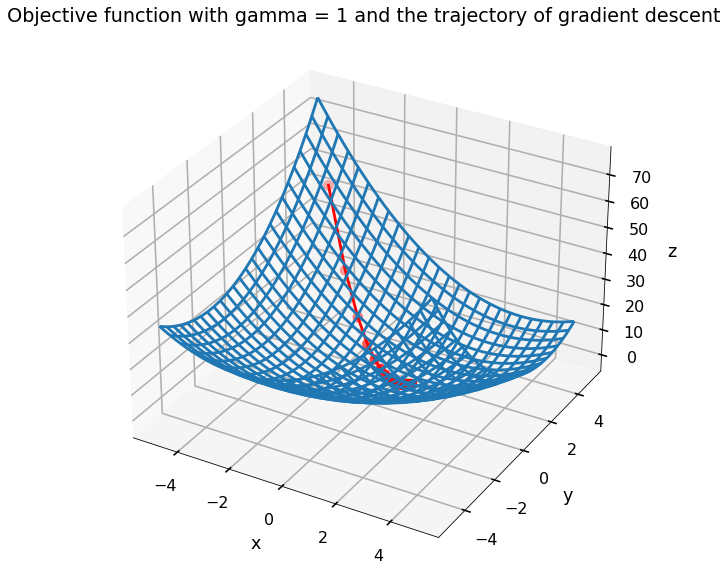

In [ ]:
# This helps us see how gradient descent traverses down to the minima on the given surface

fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = computeFunction(X, Y, 1)

#surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
surf = ax.plot_wireframe(X, Y, Z, cmap = plt.cm.cividis, rstride=2, cstride=2)
plt.title("Objective function with gamma = 1 and the trajectory of gradient descent")

# x, y, z = [4, -4], [4, -4], [40, 80]
# ax.scatter(x, y, z, c='red', s=100)
# ax.plot(x, y, z, color='red')

# Running gradient descent, starting from point (-4, 4) and gamma = 1, 500 max iterations, 0.01 convergence threshold and 0.1 step size.
x, y, z = gradientDescent(-4, 4, 1, 500, 0.01, 0.1)
ax.scatter(x, y, z, c='red', s=100)
ax.plot(x, y, z, color='red')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

### Iterations vs. Error

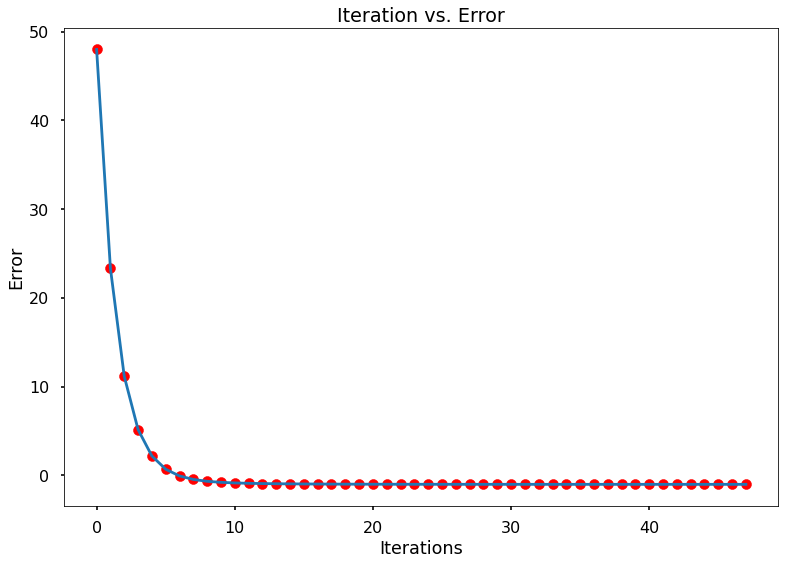

In [ ]:
# Assuming error to be the value of the function itself
iterations = range(len(z))
error = z
plt.scatter(iterations, error, c='red', s=100)
plt.plot(iterations, error)
plt.title("Iteration vs. Error")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

##

### Step-size vs. Iterations

Convergence reached after  97  iterations! Value is  -0.999952315258253
Convergence reached after  47  iterations! Value is  -0.9999500200418152
Convergence reached after  23  iterations! Value is  -0.9999651550856271
Convergence reached after  10  iterations! Value is  -0.9999634384150959
Convergence reached after  34  iterations! Value is  -0.9999876587158201


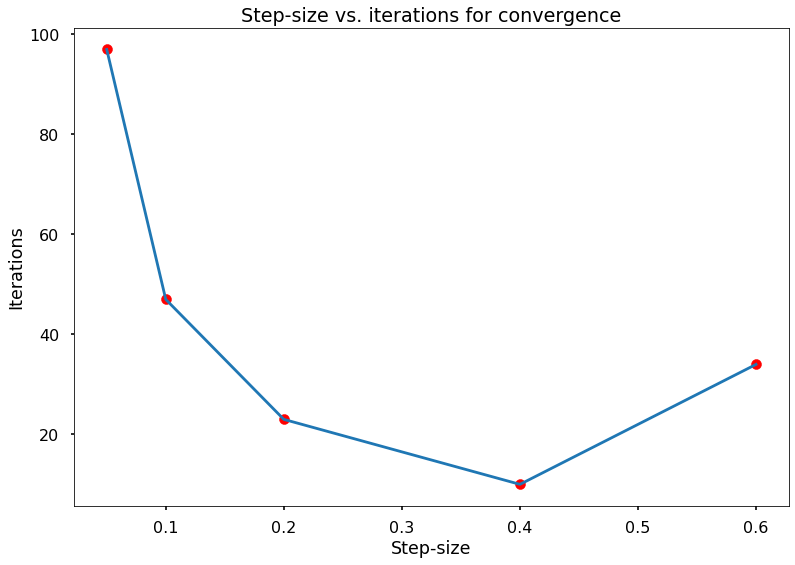

In [ ]:
steps = [0.05, 0.1, 0.2, 0.4, 0.6]
values = [gradientDescent(-4, 4, 1, 500, 0.01, step) for step in steps]
iterations = [len(values[x][-1]) -1 for x in range(len(values))]
#iterations

plt.scatter(steps, iterations, c='red', s=100)
plt.plot(steps, iterations)
plt.title("Step-size vs. iterations for convergence")
plt.xlabel('Step-size')
plt.ylabel('Iterations')
plt.show()

## 

### Gamma vs. Iterations

Convergence reached after  297  iterations! Value is  -5.874686074387325
Convergence reached after  196  iterations! Value is  -3.999795407298542
Convergence reached after  83  iterations! Value is  -1.8570546540726927
Convergence reached after  57  iterations! Value is  -1.272669627477165
Convergence reached after  47  iterations! Value is  -0.9999500200418152


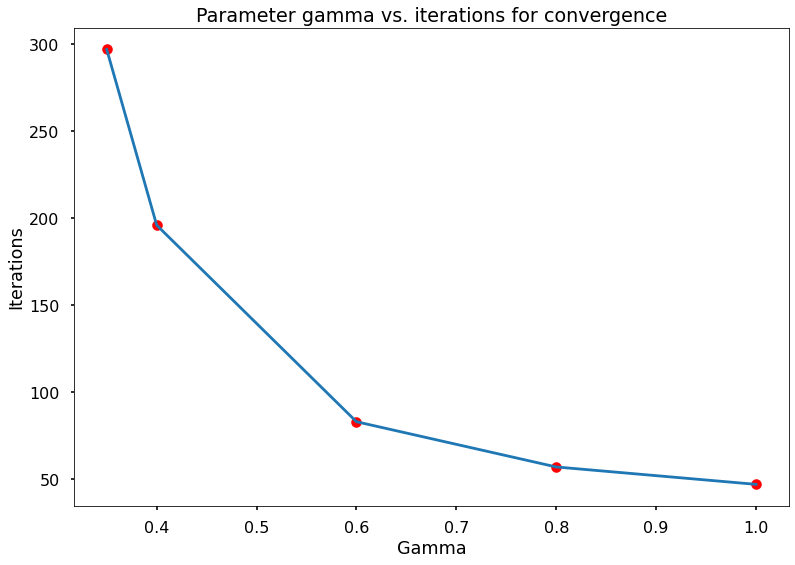

In [ ]:
gamma = [0.35, 0.4, 0.6, 0.8, 1]
values = [gradientDescent(-4, 4, param, 500, 0.01, 0.1) for param in gamma]
iterations = [len(values[x][-1]) -1 for x in range(len(values))]

plt.scatter(gamma, iterations, c='red', s=100)
plt.plot(gamma, iterations)
plt.title("Parameter gamma vs. iterations for convergence")
plt.xlabel('Gamma')
plt.ylabel('Iterations')
plt.show()

##

### Iterations vs. |Error| for Gamma = -1
#### Note: We are taking the absolute value of error since we're plotting on the log scale.

[-780.1567202649438, -44180.751792263436, -141550145.60714906, -1452983908200334.2, -1.5309526943279927e+29, -1.6996664631492784e+57, -2.094920626803513e+113, -3.182550533050101e+225]


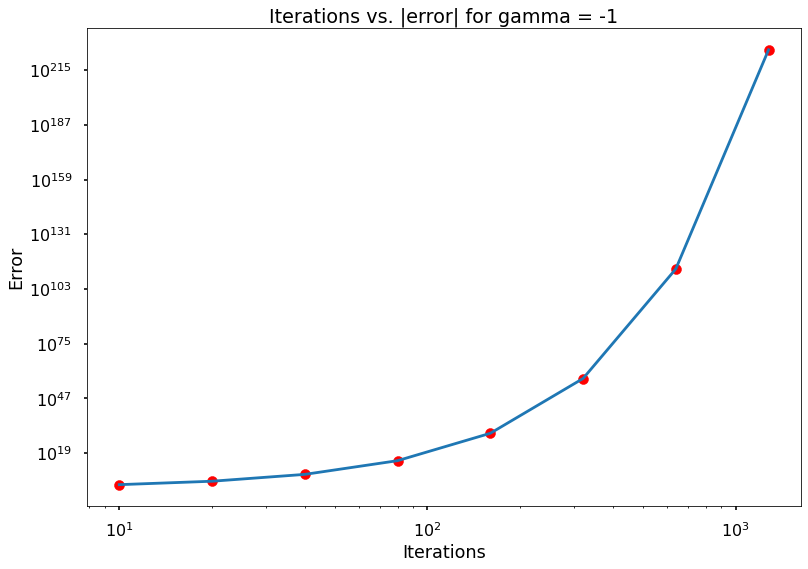

In [ ]:
iterations = [10, 20, 40, 80, 160, 320, 640, 1280]
#iterations = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
values = [gradientDescent(-4, 4, -1, i, 0.01, 0.1) for i in iterations]
errors = [values[x][-1][-1] for x in range(len(values))]
print(errors)

plt.scatter(iterations, np.abs(errors), c='red', s=100)
plt.plot(iterations, np.abs(errors))
plt.title("Iterations vs. |error| for gamma = -1")
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

### Visualization of the objective function with gamma = -1

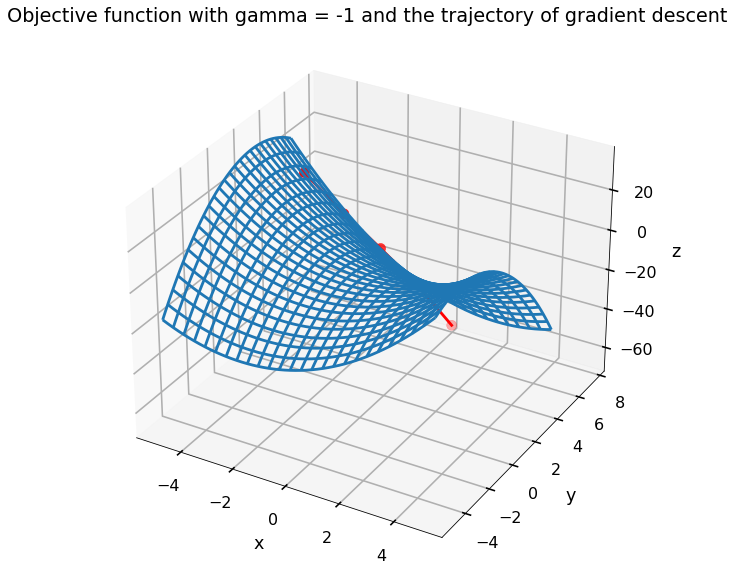

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = np.arange(-5, 5.1, 0.2)
y = np.arange(-5, 5.1, 0.2)

X, Y = np.meshgrid(x, y)
Z = computeFunction(X, Y, -1)

#surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)
surf = ax.plot_wireframe(X, Y, Z, cmap = plt.cm.cividis, rstride=2, cstride=2)
plt.title("Objective function with gamma = -1 and the trajectory of gradient descent")

x, y, z = gradientDescent(-4, 4, -1, 4, 0.01, 0.1)
ax.scatter(x, y, z, c='red', s=100)
ax.plot(x, y, z, color='red')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

#fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()

### Observations & Comments:
- The surface with gamma = -1 is not convex. It is a hyperbolic paraboloid with saddle point.
- Hence, gradient descent may converge to a saddle point or may tend toward negative infinity of the function.